In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nvidia-smi

Fri Jul 30 09:20:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!sudo apt-get install g++ openjdk-7-jdk # Install Java 1.7+
!sudo apt-get install python-dev; pip install konlpy     # Python 2.x
!sudo apt-get install python3-dev; pip3 install konlpy   # Python 3.x
!sudo apt-get install curl
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package openjdk-7-jdk is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'openjdk-7-jdk' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
0 upgraded, 0 newly installed, 0 to remove and 89 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.6.7-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 89 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.58.0-2ubuntu3.14).
0 upgraded, 0 newly installed, 0 to remove and 89 not upgraded.
mecab-ko i

In [4]:
!pip install datasets

In [5]:
#load data
from datasets import load_dataset
import pandas as pd

dataset = load_dataset("nsmc")

train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])


Using custom data configuration default
Reusing dataset nsmc (/root/.cache/huggingface/datasets/nsmc/default/1.1.0/bfd4729bf1a67114e5267e6916b9e4807010aeb238e4a3c2b95fbfa3a014b5f3)


In [6]:
train_df[:10]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [7]:
x_train = train_df['document']
y_train = train_df['label']
x_test = test_df['document']
y_test = test_df['label']

In [8]:
x_train

0                                       아 더빙.. 진짜 짜증나네요 목소리
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                             교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                  인간이 문제지.. 소는 뭔죄인가..
149996                                        평점이 너무 낮아서...
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                          청춘 영화의 최고봉.방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 150000, dtype: object

In [9]:
import re

x_train = [re.sub("[\s]+", " ", re.sub("[^가-힣a-zA-Z0-9]", " ", doc)) for doc in x_train]
x_test = [re.sub("[\s]+", " ", re.sub("[^가-힣a-zA-Z0-9]", " ", doc)) for doc in x_test]

x_train[:10]

['아 더빙 진짜 짜증나네요 목소리',
 '흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 솔직히 재미는 없다 평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화 별반개도 아까움 ',
 '원작의 긴장감을 제대로 살려내지못했다 ',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지 정말 발로해도 그것보단 낫겟다 납치 감금만반복반복 이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나 ']

In [10]:
stop_words = set(['은', '는', '이', '가', '하', '아', '것', '들','의', '있', '되', '수', '보', '주', '등', '한','더','빙'])

from konlpy.tag import Mecab, Okt
mecab = Mecab()
okt=Okt()


def preprocessing(sentencse, teg, stop_words):
    sentencse = re.sub("[^가-힣a-zA-Z0-9ㄱ-ㅎㅏ-ㅣ\\s]", "", sentencse)
    temp = []
    if teg == mecab:
        token_sent = teg.pos(sentencse)
        for token in token_sent:
            if token[1] in ['NNG', 'NNP', 'NNB', 'NNBC', 'NP' 'VV', 'VA', 'IC', 'SN', 'SL', 'MAG', 'MAJ']:
                temp.append(token[0])
        temp = [token for token in temp if not token in stop_words]
    
    else:
        token_sent = teg.pos(sentencse)
        for token in token_sent:
            if token[1] in ['Noun', 'Verb', 'Adjective', 'Adverb', 'Exclamation', 'Foreign', 'Alpha', 'Number', 'Unknown']:
                temp.append(token[0])
        temp = [token for token in temp if not token in stop_words]
    
    return temp

clean_x_train = []
clean_x_test = []

for sentencse in x_train:
    if type(sentencse) == str:
        clean_x_train.append(preprocessing(sentencse,okt,stop_words))
    else:
        pass

for sentencse in x_test:
    if type(sentencse) == str:
        clean_x_test.append(preprocessing(sentencse,okt,stop_words))
    else:
        pass


In [11]:
print(clean_x_train[:10])

[['더빙', '진짜', '짜증나네요', '목소리'], ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '가볍지', '않구나'], ['무재', '밓었', '다그', '래서', '보는것을', '추천', '다'], ['교도소', '이야기', '구먼', '솔직히', '재미', '없다', '평점', '조정'], ['몬페', '익살스런', '연기', '돋보였던', '영화', '스파이더맨', '늙어', '보이기만', '했던', '커스틴', '던스트', '너무나도', '이뻐', '보였다'], ['막', '걸음', '마', '뗀', '3', '세', '초등학교', '1', '학년', '생인', '8', '살용', '영화', '반개', '아까', '움'], ['원작', '긴장감', '제대로', '살려내지못', '했다'], ['별', '반개', '아깝다', '욕', '나온다', '이응경', '길용우', '생활', '년', '정말', '발', '해도', '그것', '낫겟다', '납치', '감금', '반복', '반복', '드라마', '가족', '없다', '연기', '하는', '사람', '네'], ['액션', '없는데도', '재미', '있는', '몇', '안되는', '영화'], ['왜케', '평점', '낮은건데', '꽤', '볼', '데', '헐리우드', '화려함에만', '너무', '길들여져', '있나']]


In [12]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
import operator
from itertools import islice

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_x_train)

train_sequences = tokenizer.texts_to_sequences(clean_x_train)
test_sequences = tokenizer.texts_to_sequences(clean_x_test)

word_vocab = tokenizer.word_index # 단어 사전 형태
word_vocab["<PAD>"] = 0

# word_vocab = sorted(word_vocab.items(), key=operator.itemgetter(1))
# word_vocab = {k: v for k, v in sorted(word_vocab.items(), key=lambda item: item[1])}
# word_vocab = dict(islice(word_vocab.items(),10000))

In [13]:
print(train_sequences[:10])
print(len(word_vocab))

[[350, 4, 6733, 543], [761, 351, 18, 499, 1, 130, 1404, 6, 5929, 25937], [2679, 45980, 6296, 8176, 11948, 135, 11], [8520, 67, 11157, 150, 25, 42, 7, 4219], [32573, 32574, 6, 6297, 1, 2872, 5170, 45981, 372, 21947, 32575, 964, 3686, 4313], [614, 7232, 837, 25938, 59, 622, 1705, 14, 1613, 19172, 262, 45982, 1, 936, 480, 153], [128, 229, 240, 32576, 154], [166, 936, 91, 249, 609, 13959, 21948, 1571, 531, 3, 632, 282, 469, 32577, 3555, 11158, 1335, 1335, 13, 183, 42, 6, 17, 16, 961], [58, 19173, 25, 55, 709, 316, 1], [1521, 7, 45983, 422, 45, 299, 1394, 45984, 2, 25939, 952]]
100650


In [14]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

maxlen = max(len(x) for x in train_sequences)

x_train = pad_sequences(train_sequences, maxlen=maxlen, padding='post')
x_test = pad_sequences(test_sequences, maxlen=maxlen, padding='post')

In [15]:
len(x_train[0])

67

In [16]:
from gensim.models import word2vec
import numpy as np

w2v = word2vec.Word2Vec.load("/content/drive/MyDrive/code/cnn_classify/data/ko.bin")
print(w2v.vector_size)

200


In [17]:
embedding_matrix = np.zeros((len(word_vocab), 200))
print(np.shape(embedding_matrix))

def get_vector(word):
    if word in w2v:
        return w2v[word]
    else:
        return None

for word, i in word_vocab.items():
    temp = get_vector(word)
    if temp is not None:
        embedding_matrix[i] = temp

print(embedding_matrix)

(100650, 200)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-1.75778365 -1.08742785  1.53008664 ...  0.48126751  0.52710861
   0.94171894]
 [-0.8128286   0.1556471  -0.36339697 ...  1.77300692 -1.25128031
  -0.71058255]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

vocab_size = len(word_vocab)
embedding_dim = 200
max_length = 120


model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_length),
                             tf.keras.layers.Conv1D(128, 5, activation='relu'),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')

])


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 200)          20130000  
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          128128    
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 20,266,449
Trainable params: 20,266,449
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
NUM_EPOCHS = 10

history = model.fit(x_train, y_train, batch_size=64 ,validation_data=(x_test, y_test),epochs=NUM_EPOCHS)

Epoch 1/10
2344/2344 [==============================] - 439s 186ms/step - loss: 0.4075 - accuracy: 0.8116 - val_loss: 0.3453 - val_accuracy: 0.8491
Epoch 2/10
2344/2344 [==============================] - 435s 185ms/step - loss: 0.2653 - accuracy: 0.8916 - val_loss: 0.3501 - val_accuracy: 0.8505
Epoch 3/10
2344/2344 [==============================] - 436s 186ms/step - loss: 0.1975 - accuracy: 0.9234 - val_loss: 0.3698 - val_accuracy: 0.8459
Epoch 4/10
2344/2344 [==============================] - 434s 185ms/step - loss: 0.1475 - accuracy: 0.9440 - val_loss: 0.4332 - val_accuracy: 0.8417
Epoch 5/10
2344/2344 [==============================] - 432s 184ms/step - loss: 0.1093 - accuracy: 0.9584 - val_loss: 0.5127 - val_accuracy: 0.8376
Epoch 6/10
2344/2344 [==============================] - 431s 184ms/step - loss: 0.0807 - accuracy: 0.9694 - val_loss: 0.6914 - val_accuracy: 0.8382
Epoch 7/10
2344/2344 [==============================] - 431s 184ms/step - loss: 0.0616 - accuracy: 0.9768 - val_

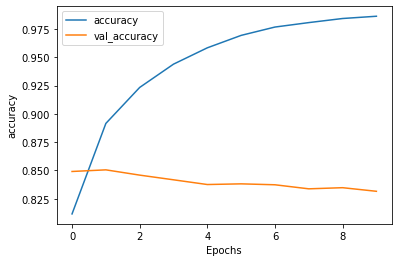

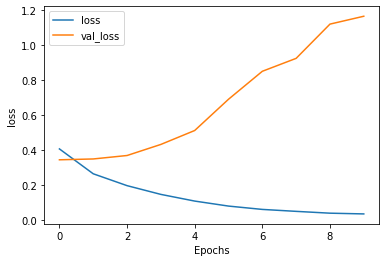

In [22]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')
